<a href="https://colab.research.google.com/github/lunagferreira/Lab-Song-Classification/blob/main/lab_song_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_validate,
    GridSearchCV, cross_val_predict
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    make_scorer, accuracy_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay
)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
# Download data
!wget -O training_data.csv http://handsonml.control.lth.se/data/training_data.csv
!wget -O songs_to_classify.csv http://handsonml.control.lth.se/data/songs_to_classify.csv

--2025-10-02 10:30:58--  http://handsonml.control.lth.se/data/training_data.csv
Resolving handsonml.control.lth.se (handsonml.control.lth.se)... 130.235.83.36, 2001:6b0:16:248:2406:1311:4200:0
Connecting to handsonml.control.lth.se (handsonml.control.lth.se)|130.235.83.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54950 (54K) [text/csv]
Saving to: ‘training_data.csv’

training_data.csv   100%[===================>]  53.66K   263KB/s    in 0.2s    

2025-10-02 10:30:59 (263 KB/s) - ‘training_data.csv’ saved [54950/54950]

--2025-10-02 10:30:59--  http://handsonml.control.lth.se/data/songs_to_classify.csv
Resolving handsonml.control.lth.se (handsonml.control.lth.se)... 130.235.83.36, 2001:6b0:16:248:2406:1311:4200:0
Connecting to handsonml.control.lth.se (handsonml.control.lth.se)|130.235.83.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14306 (14K) [text/csv]
Saving to: ‘songs_to_classify.csv’

songs_to_classify.c 100%[==========

In [3]:
# Load data
train = pd.read_csv("training_data.csv")
test = pd.read_csv("songs_to_classify.csv")
train.shape, test.shape

((750, 14), (200, 13))

In [4]:
# Inspect data
train.sample(5)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
512,0.1610,0.623,181427,0.624,0.01490,9,0.2780,-5.864,1,0.0757,87.020,4,0.554,0
421,0.7840,0.401,243040,0.430,0.00502,1,0.9220,-9.250,1,0.0331,87.938,4,0.152,1
75,0.3770,0.594,170427,0.497,0.00000,1,0.1030,-8.155,1,0.0340,110.924,4,0.498,1
39,0.0284,0.856,174785,0.854,0.00000,6,0.0450,-3.980,1,0.1030,117.947,4,0.846,0
504,0.0403,0.836,217947,0.544,0.00000,7,0.0824,-5.975,1,0.0943,97.028,4,0.510,0


In [5]:
# select which features to use
features = ['danceability','key','loudness','instrumentalness','liveness']
X_train = train.loc[:,features].values
y_train = train.loc[:,'label'].values
X_test = test.loc[:,features].values

In [6]:
# Normalize data. Can also be done using sklearn methods such as
# MinMaxScaler() or StandardScaler()
X_trainn = X_train*1/np.max(np.abs(X_train), axis=0)
X_testn = X_test*1/np.max(np.abs(X_train), axis=0)

In [7]:
# note: all inputs/features are treated as quantitative/numeric
# some of the features are perhaps more sensible to treat as
# qualitative/cathegorical. For that sklearn preprocessing methods
# such as OneHotEncoder() can be used

# define the k-NN model. To set n_neighbors in a systematic way, use cross validation!
knnmodel = KNeighborsClassifier(n_neighbors=5)

# feed it with data and train it
knnmodel.fit(X_trainn, y_train)

# make predictions
predictions = knnmodel.predict(X=X_testn)
print(predictions)

[0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1
 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1
 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0
 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1
 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1]


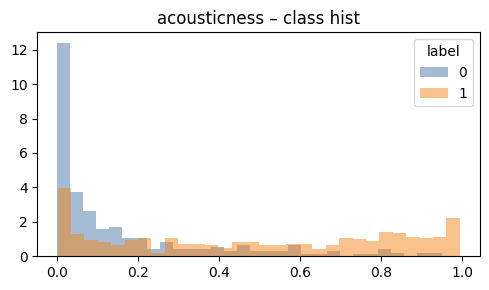

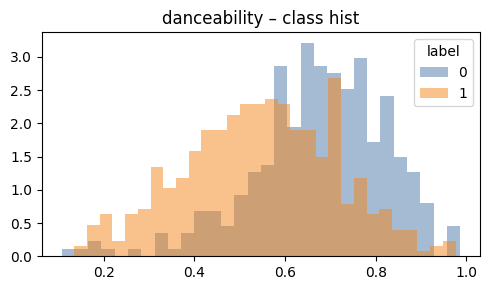

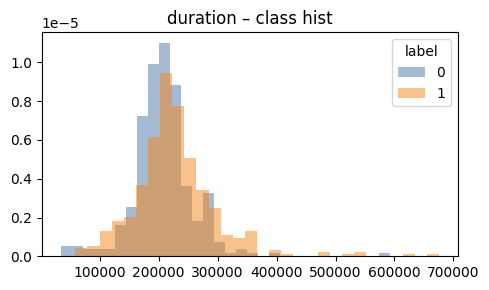

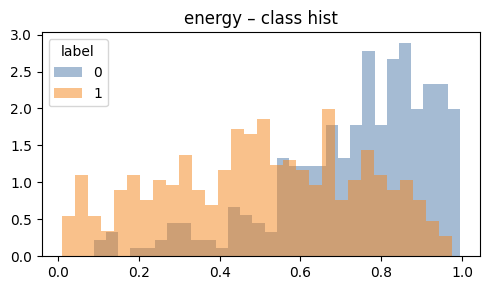

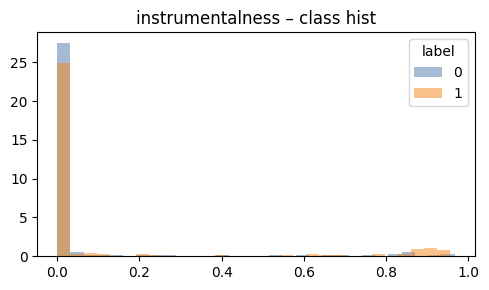

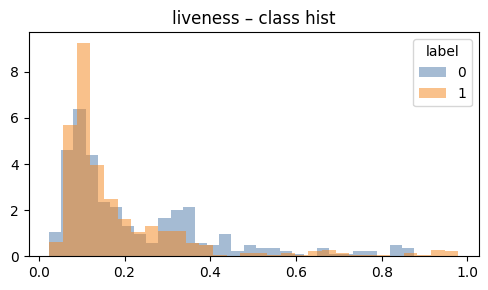

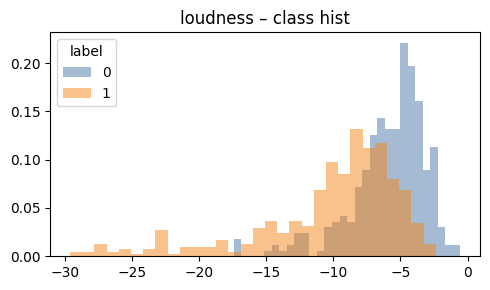

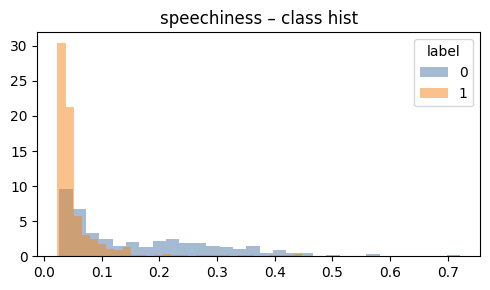

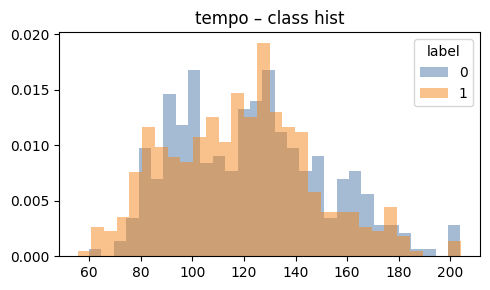

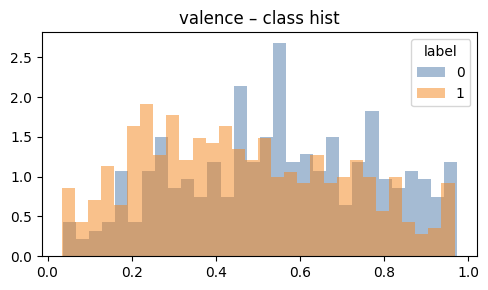

/tmp/ipython-input-3674780202.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='label', y=f, palette=["#4C78A8", "#F58518"])


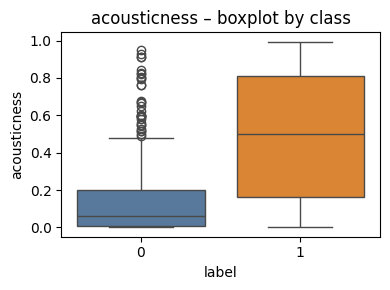

/tmp/ipython-input-3674780202.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='label', y=f, palette=["#4C78A8", "#F58518"])


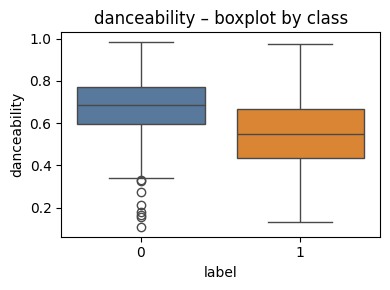

/tmp/ipython-input-3674780202.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='label', y=f, palette=["#4C78A8", "#F58518"])


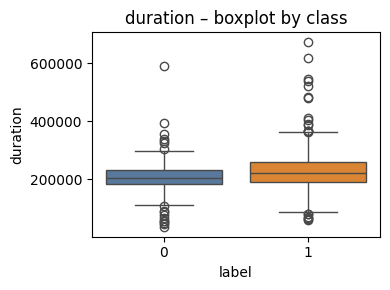

/tmp/ipython-input-3674780202.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='label', y=f, palette=["#4C78A8", "#F58518"])


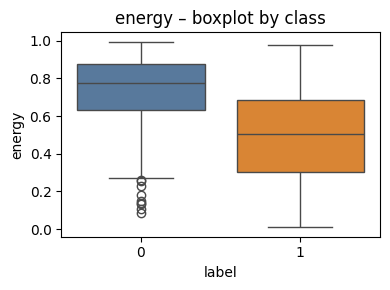

/tmp/ipython-input-3674780202.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='label', y=f, palette=["#4C78A8", "#F58518"])


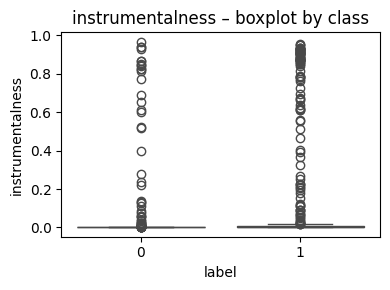

/tmp/ipython-input-3674780202.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='label', y=f, palette=["#4C78A8", "#F58518"])


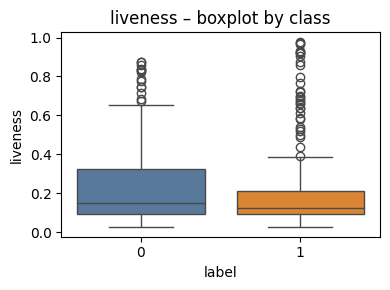

/tmp/ipython-input-3674780202.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='label', y=f, palette=["#4C78A8", "#F58518"])


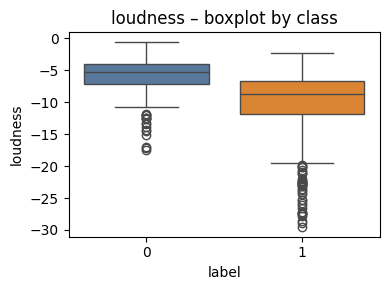

/tmp/ipython-input-3674780202.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='label', y=f, palette=["#4C78A8", "#F58518"])


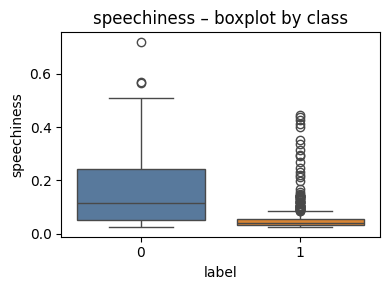

/tmp/ipython-input-3674780202.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='label', y=f, palette=["#4C78A8", "#F58518"])


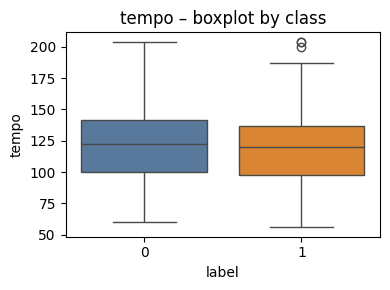

/tmp/ipython-input-3674780202.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='label', y=f, palette=["#4C78A8", "#F58518"])


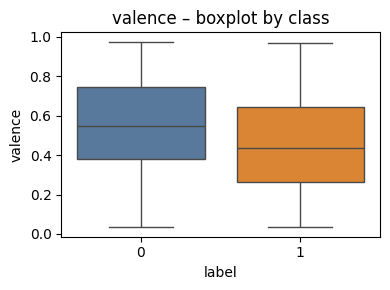

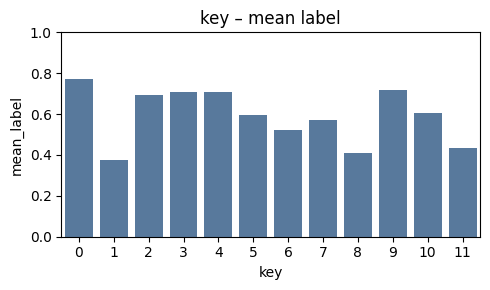

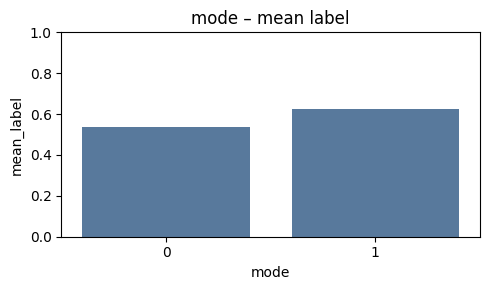

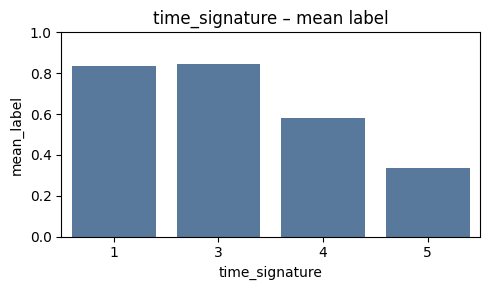


Correlation with label (abs sorted):
speechiness        -0.481
acousticness        0.479
energy             -0.459
loudness           -0.424
danceability       -0.369
valence            -0.179
duration            0.139
instrumentalness    0.134
liveness           -0.109
tempo              -0.072
Name: label, dtype: float64

Univariate CV AUC:
speechiness         0.806
loudness            0.793
acousticness        0.787
energy              0.777
danceability        0.727
valence             0.603
instrumentalness    0.595
duration            0.589
liveness            0.562
tempo               0.535
dtype: float64


In [8]:
# --- Define features for later methods ---
num_feats = [
    'acousticness', 'danceability', 'duration', 'energy',
    'instrumentalness', 'liveness', 'loudness',
    'speechiness', 'tempo', 'valence'
]
cat_feats = ['key', 'mode', 'time_signature']

# --- Exploratory analysis (plots) ---

# Numeric distributions by class
for f in num_feats:
    plt.figure(figsize=(5, 3))
    for lab, color in [(0, "#4C78A8"), (1, "#F58518")]:
        plt.hist(
            train.loc[train['label'] == lab, f],
            bins=30, alpha=0.5, label=str(lab),
            color=color, density=True
        )
    plt.title(f"{f} – class hist")
    plt.legend(title="label")
    plt.tight_layout()
    plt.show()

# Numeric boxplots by class
for f in num_feats:
    plt.figure(figsize=(4, 3))
    sns.boxplot(data=train, x='label', y=f, palette=["#4C78A8", "#F58518"])
    plt.title(f"{f} – boxplot by class")
    plt.tight_layout()
    plt.show()

# Categorical bars (share of class 1 per category)
for f in cat_feats:
    tmp = train.groupby(f)['label'].mean().reset_index(name='mean_label')
    plt.figure(figsize=(5, 3))
    sns.barplot(data=tmp, x=f, y='mean_label', color="#4C78A8")
    plt.title(f"{f} – mean label")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

# --- Correlation with label (point-biserial) ---
corr_tbl = train[num_feats + ['label']].corr().loc[num_feats, 'label'] \
             .sort_values(key=np.abs, ascending=False)
print("\nCorrelation with label (abs sorted):")
print(corr_tbl.round(3))

# --- Univariate AUC (1D logistic regression, 5-fold CV) ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
uni_auc = {}
for f in num_feats:
    Xf = train[[f]].values
    y = train['label'].values
    pipe = Pipeline([
        ('sc', StandardScaler()),
        ('lr', LogisticRegression(max_iter=1000))
    ])
    auc = cross_validate(pipe, Xf, y, cv=cv,
                         scoring='roc_auc', n_jobs=-1)['test_score'].mean()
    uni_auc[f] = auc

uni_auc = pd.Series(uni_auc).sort_values(ascending=False)
print("\nUnivariate CV AUC:")
print(uni_auc.round(3))

In [14]:
# Baseline on top features with a clean Pipeline (CV)

# Top numeric features from EDA + categoricals
top_num = ['speechiness', 'acousticness', 'energy', 'loudness', 'danceability']
top_cat = ['key', 'mode', 'time_signature']

# Build X/y
X_top = train[top_num + top_cat].copy()
y_top = train['label'].astype(int).values

# Preprocessing: scale numeric and one-hot encode categorical
pre_top = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), top_num),
        ('cat', OneHotEncoder(handle_unknown='ignore'), top_cat)
    ],
    remainder='drop'
)

# k-NN model with k=5
knn_pipe = Pipeline([
    ('prep', pre_top),
    ('clf', KNeighborsClassifier(n_neighbors=5))
])

# Evaluate with 5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'acc': 'accuracy',
    'f1': 'f1',
    'auc': 'roc_auc'
}

res_knn_top = cross_validate(knn_pipe, X_top, y_top, cv=cv, scoring=scoring, n_jobs=-1)
print("k-NN (top features) CV results:")
print(f"  Accuracy: {res_knn_top['test_acc'].mean():.3f} ± {res_knn_top['test_acc'].std():.3f}")
print(f"  F1-score: {res_knn_top['test_f1'].mean():.3f} ± {res_knn_top['test_f1'].std():.3f}")
print(f"  ROC-AUC:  {res_knn_top['test_auc'].mean():.3f} ± {res_knn_top['test_auc'].std():.3f}")

# Logistic Regression baseline
logreg_top = Pipeline([
    ('prep', pre_top),
    ('clf', LogisticRegression(max_iter=1000, n_jobs=-1, solver='saga'))
])

res_lr_top = cross_validate(logreg_top, X_top, y_top, cv=cv, scoring=scoring, n_jobs=-1)
print("\nLogistic Regression (top features) CV results:")
print(f"  Accuracy: {res_lr_top['test_acc'].mean():.3f} ± {res_lr_top['test_acc'].std():.3f}")
print(f"  F1-score: {res_lr_top['test_f1'].mean():.3f} ± {res_lr_top['test_f1'].std():.3f}")
print(f"  ROC-AUC:  {res_lr_top['test_auc'].mean():.3f} ± {res_lr_top['test_auc'].std():.3f}")

# Random Forest baseline
rf_top = Pipeline([
    ('prep', pre_top),
    ('clf', RandomForestClassifier(
        n_estimators=300, random_state=42, n_jobs=-1
    ))
])
res_rf_top = cross_validate(rf_top, X_top, y_top, cv=cv, scoring=scoring, n_jobs=-1)
print("\nRandom Forest (top features) CV:")
print(f"  Accuracy: {res_rf_top['test_acc'].mean():.3f} ± {res_rf_top['test_acc'].std():.3f}")
print(f"  F1-score: {res_rf_top['test_f1'].mean():.3f} ± {res_rf_top['test_f1'].std():.3f}")
print(f"  ROC-AUC:  {res_rf_top['test_auc'].mean():.3f} ± {res_rf_top['test_auc'].std():.3f}")

# Gradient Boosting baseline
gb_top = Pipeline([
    ('prep', pre_top),
    ('clf', GradientBoostingClassifier(
        n_estimators=200,      # number of boosting stages
        learning_rate=0.1,     # step size shrinkage
        max_depth=3,           # depth of individual trees
        random_state=42
    ))
])

res_gb_top = cross_validate(gb_top, X_top, y_top, cv=cv, scoring=scoring, n_jobs=-1)
print("\nGradient Boosting (top features) CV:")
print(f"  Accuracy: {res_gb_top['test_acc'].mean():.3f} ± {res_gb_top['test_acc'].std():.3f}")
print(f"  F1-score: {res_gb_top['test_f1'].mean():.3f} ± {res_gb_top['test_f1'].std():.3f}")
print(f"  ROC-AUC:  {res_gb_top['test_auc'].mean():.3f} ± {res_gb_top['test_auc'].std():.3f}")

# --- SVM baseline (top features) ---
svm_top = Pipeline([
    ('prep', pre_top),
    ('clf', SVC(
        kernel='rbf',        # radial basis function kernel
        C=1.0,               # regularization strength
        gamma='scale',       # kernel coefficient
        probability=True,    # necessário para calcular ROC-AUC
        random_state=42
    ))
])

res_svm_top = cross_validate(svm_top, X_top, y_top, cv=cv, scoring=scoring, n_jobs=-1)
print("\nSVM (top features) CV:")
print(f"  Accuracy: {res_svm_top['test_acc'].mean():.3f} ± {res_svm_top['test_acc'].std():.3f}")
print(f"  F1-score: {res_svm_top['test_f1'].mean():.3f} ± {res_svm_top['test_f1'].std():.3f}")
print(f"  ROC-AUC:  {res_svm_top['test_auc'].mean():.3f} ± {res_svm_top['test_auc'].std():.3f}")

k-NN (top features) CV results:
  Accuracy: 0.807 ± 0.031
  F1-score: 0.843 ± 0.024
  ROC-AUC:  0.870 ± 0.021

Logistic Regression (top features) CV results:
  Accuracy: 0.803 ± 0.048
  F1-score: 0.837 ± 0.041
  ROC-AUC:  0.882 ± 0.036

Random Forest (top features) CV:
  Accuracy: 0.828 ± 0.044
  F1-score: 0.859 ± 0.037
  ROC-AUC:  0.906 ± 0.030

Gradient Boosting (top features) CV:
  Accuracy: 0.813 ± 0.042
  F1-score: 0.846 ± 0.036
  ROC-AUC:  0.890 ± 0.029

SVM (top features) CV:
  Accuracy: 0.816 ± 0.035
  F1-score: 0.848 ± 0.028
  ROC-AUC:  0.890 ± 0.034


In [15]:
# Compare models with all features

# Build dataset with all features
X_all = train[num_feats + cat_feats].copy()
y_all = train['label'].astype(int).values

# Preprocessing for Logistic Regression (scale numeric, one-hot categorical)
pre_all_scaled = ColumnTransformer(
    [('num', StandardScaler(), num_feats),
     ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feats)],
    remainder='drop'
)

# Preprocessing for Random Forest (no scaling, only one-hot categorical)
pre_all_rf = ColumnTransformer(
    [('num', 'passthrough', num_feats),
     ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feats)],
    remainder='drop'
)

# k-NN with all features
knn_all = Pipeline([
    ('prep', pre_all_scaled),
    ('clf', KNeighborsClassifier(n_neighbors=5))
])
res_knn_all = cross_validate(knn_all, X_all, y_all, cv=cv, scoring=scoring, n_jobs=-1)
print("k-NN (ALL features) CV results:")
print(f"  Accuracy: {res_knn_all['test_acc'].mean():.3f} ± {res_knn_all['test_acc'].std():.3f}")
print(f"  F1-score: {res_knn_all['test_f1'].mean():.3f} ± {res_knn_all['test_f1'].std():.3f}")
print(f"  ROC-AUC:  {res_knn_all['test_auc'].mean():.3f} ± {res_knn_all['test_auc'].std():.3f}")

# Logistic Regression with all features
logreg_all = Pipeline([
    ('prep', pre_all_scaled),
    ('clf', LogisticRegression(max_iter=1000, n_jobs=-1, solver='saga'))
])
res_lr_all = cross_validate(logreg_all, X_all, y_all, cv=cv, scoring=scoring, n_jobs=-1)
print("\nLogistic Regression (ALL features) CV results:")
print(f"  Accuracy: {res_lr_all['test_acc'].mean():.3f} ± {res_lr_all['test_acc'].std():.3f}")
print(f"  F1-score: {res_lr_all['test_f1'].mean():.3f} ± {res_lr_all['test_f1'].std():.3f}")
print(f"  ROC-AUC:  {res_lr_all['test_auc'].mean():.3f} ± {res_lr_all['test_auc'].std():.3f}")

# Random Forest with all features
rf_all = Pipeline([
    ('prep', pre_all_rf),
    ('clf', RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1))
])
res_rf_all = cross_validate(rf_all, X_all, y_all, cv=cv, scoring=scoring, n_jobs=-1)
print("\nRandom Forest (ALL features) CV results:")
print(f"  Accuracy: {res_rf_all['test_acc'].mean():.3f} ± {res_rf_all['test_acc'].std():.3f}")
print(f"  F1-score: {res_rf_all['test_f1'].mean():.3f} ± {res_rf_all['test_f1'].std():.3f}")
print(f"  ROC-AUC:  {res_rf_all['test_auc'].mean():.3f} ± {res_rf_all['test_auc'].std():.3f}")


# Gradient Boosting (all features)
gb_all = Pipeline([
    ('prep', pre_all_scaled),
    ('clf', GradientBoostingClassifier(
        n_estimators=200,      # number of boosting stages
        learning_rate=0.1,     # step size shrinkage
        max_depth=3,           # depth of individual trees
        random_state=42
    ))
])

res_gb_all = cross_validate(gb_all, X_all, y_all, cv=cv, scoring=scoring, n_jobs=-1)
print("\nGradient Boosting (ALL features) CV:")
print(f"  Accuracy: {res_gb_all['test_acc'].mean():.3f} ± {res_gb_all['test_acc'].std():.3f}")
print(f"  F1-score: {res_gb_all['test_f1'].mean():.3f} ± {res_gb_all['test_f1'].std():.3f}")
print(f"  ROC-AUC:  {res_gb_all['test_auc'].mean():.3f} ± {res_gb_all['test_auc'].std():.3f}")

# --- SVM baseline (all features) ---
svm_all = Pipeline([
    ('prep', pre_all_scaled),
    ('clf', SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        probability=True,
        random_state=42
    ))
])

res_svm_all = cross_validate(svm_all, X_all, y_all, cv=cv, scoring=scoring, n_jobs=-1)
print("\nSVM (ALL features) CV:")
print(f"  Accuracy: {res_svm_all['test_acc'].mean():.3f} ± {res_svm_all['test_acc'].std():.3f}")
print(f"  F1-score: {res_svm_all['test_f1'].mean():.3f} ± {res_svm_all['test_f1'].std():.3f}")
print(f"  ROC-AUC:  {res_svm_all['test_auc'].mean():.3f} ± {res_svm_all['test_auc'].std():.3f}")

# Train final model on all features (best model: Random Forest)
final_model = rf_all.fit(X_all, y_all)

# Predict on test set (200 songs)
X_test_all = test[num_feats + cat_feats].copy()
pred_test = final_model.predict(X_test_all).astype(int)

# Build submission string
submit_str = ''.join(map(str, pred_test))
print("\nSubmission string:")
print(submit_str)
print(f"Length: {len(submit_str)}")

k-NN (ALL features) CV results:
  Accuracy: 0.801 ± 0.024
  F1-score: 0.844 ± 0.016
  ROC-AUC:  0.867 ± 0.031

Logistic Regression (ALL features) CV results:
  Accuracy: 0.801 ± 0.045
  F1-score: 0.837 ± 0.037
  ROC-AUC:  0.887 ± 0.036

Random Forest (ALL features) CV results:
  Accuracy: 0.843 ± 0.049
  F1-score: 0.870 ± 0.043
  ROC-AUC:  0.915 ± 0.030

Gradient Boosting (ALL features) CV:
  Accuracy: 0.831 ± 0.043
  F1-score: 0.861 ± 0.036
  ROC-AUC:  0.905 ± 0.028

SVM (ALL features) CV:
  Accuracy: 0.828 ± 0.043
  F1-score: 0.860 ± 0.033
  ROC-AUC:  0.897 ± 0.037

Submission string:
00010011001101101111001100001011011111010101110110001101100011100111101011010110110101100000011011111010010111110010101001101110101011111111101011001010001111101101111111111000011011111110100111110111
Length: 200
